# <center>Project 1</center>

Authored by Joshua Burrows and Maksim Nikiforov.

## <center>Introduction</center>

To do (Maksim).

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read in the data
bike_data = pd.read_csv("bikeDetails.csv")

# Display a small snippet of it
bike_data.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


## <center>Exploratory Data Analysis</center>

In [89]:
# Create numeric summaries for selling_price and group by year
annual_num_summaries = bike_data \
.groupby("year") \
.agg(
    max_selling_price = ("selling_price", max), 
    min_selling_price = ("selling_price", min),
    standard_dev = ("selling_price", np.std)
)

# Identify number of motorcycles sold every year
num_sold = bike_data[["year", "name"]].groupby("year").count().sort_values(by="year", ascending=False)

# Merge number of motorcycles sold every year into our summaries data frame
annual_num_summaries["num_sold"] = num_sold["name"]

# Display numeric summaries for the last 10 years while rounding standard deviation
annual_num_summaries.sort_values(by="year", ascending=False).head(11).round(1)

,max_selling_price,min_selling_price,standard_dev,num_sold
year,,,,
2020,190000,175000,7637.6,3
2019,760000,40000,96703.4,86
2018,300000,30000,46394.5,131
2017,425000,18000,50627.9,133
2016,300000,23000,36006.2,107
2015,185000,20000,35627.3,100
2014,330000,15000,36973.1,91
2013,750000,15000,85138.2,73
2012,100000,12000,19431.2,70


In [124]:
# Create average price and km summaries for motorcycles
highest_lowest_selling = bike_data \
.groupby("name") \
.agg(
    mean_selling_price = ("selling_price", np.mean),
    mean_km_driven = ("km_driven", np.mean)
)

# Count number of sales for each make and model
names_sold = bike_data \
.groupby("name").count()

# Merge number of sales into price and km data frame
highest_lowest_selling["num_sold"] = names_sold["selling_price"]

# Show top 10 highest-priced motorcyles
highest_lowest_selling.sort_values(by="mean_selling_price", ascending=False).head(10).round(0)

,mean_selling_price,mean_km_driven,num_sold
name,,,
Suzuki GSX S750,760000.0,2800.0,1
Harley-Davidson Street Bob,750000.0,12000.0,1
Yamaha YZF R3,365000.0,1127.0,1
Kawasaki Ninja 650 [2018-2019],362500.0,12800.0,2
Harley-Davidson Street 750,330000.0,6500.0,1
Kawasaki Ninja 300,300000.0,9800.0,1
BMW G310GS,300000.0,2500.0,1
Royal Enfield Continental GT 650,299000.0,1500.0,1
Royal Enfield Interceptor 650,271667.0,5233.0,3


In [125]:
# Show top 10 lowest-priced motorcyles
highest_lowest_selling.sort_values(by="mean_selling_price", ascending=True).head(10).round(0)

,mean_selling_price,mean_km_driven,num_sold
name,,,
TVS Excel,5000.0,60000.0,1
Hero Honda Passion,9000.0,66191.0,1
Hero Honda CD100SS,10000.0,646000.0,1
Hero Honda CBZ,10000.0,48000.0,1
TVS Centra,10000.0,50000.0,1
Hero Honda Street Smart,10000.0,24000.0,1
Bajaj Boxer,12333.0,21833.0,3
Bajaj Super,13000.0,28000.0,2
TVS Scooty Pep DLX,14500.0,44000.0,1


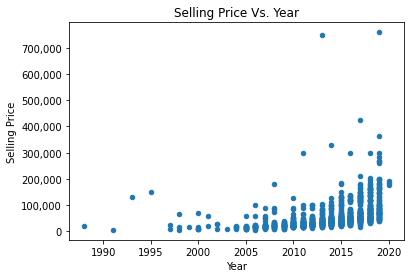

In [3]:
# What is the unit of selling_price? Is it in cents? 

bike_data.plot.scatter(x = "year", y = "selling_price")
plt.title("Selling Price Vs. Year")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.yticks(ticks = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000],
           labels = ["0", "100,000", "200,000", "300,000", "400,000", "500,000", "600,000", "700,000"])
plt.show()

## <center>Prediction of `selling_price`</center>